In [1]:
#!pip install tensorflow

In [1]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


In [37]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape images to include the channel dimension (28x28x1)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))


In [38]:
# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [39]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [40]:
# Train the model
history = model.fit(train_images, train_labels, epochs=5, 
                    validation_split=0.2, 
                    batch_size=64)


Epoch 1/5
750/750 [==============================] - 50s 65ms/step - loss: 0.2138 - accuracy: 0.9333 - val_loss: 0.0771 - val_accuracy: 0.9751
Epoch 2/5
750/750 [==============================] - 47s 63ms/step - loss: 0.0575 - accuracy: 0.9818 - val_loss: 0.0536 - val_accuracy: 0.9835
Epoch 3/5
750/750 [==============================] - 50s 67ms/step - loss: 0.0405 - accuracy: 0.9871 - val_loss: 0.0411 - val_accuracy: 0.9875
Epoch 4/5
750/750 [==============================] - 49s 65ms/step - loss: 0.0326 - accuracy: 0.9900 - val_loss: 0.0397 - val_accuracy: 0.9887
Epoch 5/5
750/750 [==============================] - 50s 66ms/step - loss: 0.0264 - accuracy: 0.9911 - val_loss: 0.0390 - val_accuracy: 0.9887


In [41]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")


313/313 - 3s - loss: 0.0326 - accuracy: 0.9902 - 3s/epoch - 10ms/step
Test accuracy: 0.9901999831199646


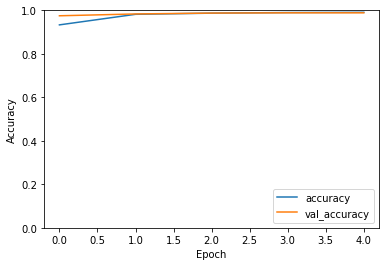

In [42]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


In [45]:
predictions = model.predict(test_images)
print(f"Predicted class for the first test image: {np.argmax(predictions[0])}")
print(f"True class for the first test image: {test_labels[0]}")

313/313 [==============================] - 3s 10ms/step
Predicted class for the first test image: 7
True class for the first test image: 7


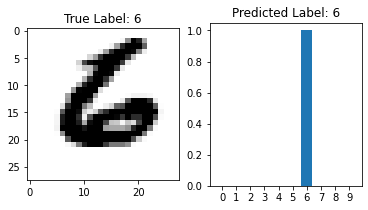

In [56]:
# Function to display an image and its predicted and true labels
def display_image_with_prediction(index):
    plt.figure(figsize=(6, 3))
    
    # Display the image
    plt.subplot(1, 2, 1)
    plt.imshow(test_images[index].reshape(28, 28), cmap=plt.cm.binary)
    plt.title(f"True Label: {test_labels[index]}")
    
    # Display the bar chart of probabilities
    plt.subplot(1, 2, 2)
    plt.bar(range(10), predictions[index])
    plt.title(f"Predicted Label: {np.argmax(predictions[index])}")
    plt.xticks(range(10))
    
    plt.show()

# Display the first image with its predicted and true labels
display_image_with_prediction(9999)

Epoch 1/10
625/625 [==============================] - 2065s 3s/step - loss: 1.7744 - accuracy: 0.3320 - val_loss: 1.5654 - val_accuracy: 0.4217
Epoch 2/10
625/625 [==============================] - 56s 89ms/step - loss: 1.4964 - accuracy: 0.4506 - val_loss: 1.4077 - val_accuracy: 0.4871
Epoch 3/10
625/625 [==============================] - 72s 115ms/step - loss: 1.4188 - accuracy: 0.4821 - val_loss: 1.3973 - val_accuracy: 0.4977
Epoch 4/10
625/625 [==============================] - 77s 123ms/step - loss: 1.3177 - accuracy: 0.5207 - val_loss: 1.3069 - val_accuracy: 0.5272
Epoch 5/10
625/625 [==============================] - 76s 121ms/step - loss: 1.2339 - accuracy: 0.5541 - val_loss: 1.2251 - val_accuracy: 0.5578
Epoch 6/10
625/625 [==============================] - 76s 122ms/step - loss: 1.1643 - accuracy: 0.5810 - val_loss: 1.1712 - val_accuracy: 0.5768
Epoch 7/10
625/625 [==============================] - 79s 127ms/step - loss: 1.1065 - accuracy: 0.6003 - val_loss: 1.1638 - val_accu

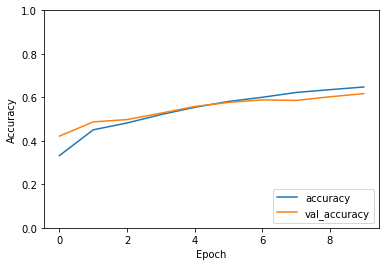

1/1 [==============================] - 0s 338ms/step


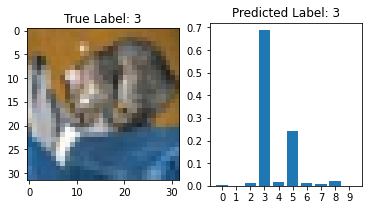

In [58]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load and preprocess data
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Convert labels to one-hot encoding
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

# Build the model
model = models.Sequential()

# Add convolutional layers to extract features
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the output of the convolutional layers
model.add(layers.Flatten())

# Add an RNN layer
model.add(layers.Reshape((64, -1)))
model.add(layers.SimpleRNN(128))

# Add a fully connected layer and output layer
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_split=0.2, 
                    batch_size=64)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Function to display an image and its predicted and true labels
def display_image_with_prediction(index):
    plt.figure(figsize=(6, 3))

    # Display the image
    plt.subplot(1, 2, 1)
    plt.imshow(test_images[index])
    plt.title(f"True Label: {np.argmax(test_labels[index])}")

    # Display the bar chart of probabilities
    plt.subplot(1, 2, 2)
    prediction = model.predict(np.expand_dims(test_images[index], axis=0))
    plt.bar(range(10), prediction[0])
    plt.title(f"Predicted Label: {np.argmax(prediction[0])}")
    plt.xticks(range(10))

    plt.show()

# Display the first image with its predicted and true labels
display_image_with_prediction(0)


1/1 [==============================] - 0s 41ms/step


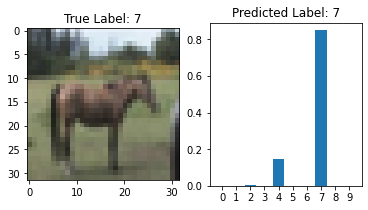

In [63]:
display_image_with_prediction(9999)


In [61]:
test_images.shape

(10000, 32, 32, 3)